In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Statement,Label
0,Says the Annies List political group supports ...,False
1,When did the decline of coal start? It started...,True
2,"Hillary Clinton agrees with John McCain ""by vo...",True
3,Health care reform legislation is likely to ma...,False
4,The economic turnaround started at the end of ...,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Statement  10240 non-null  object
 1   Label      10240 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 90.1+ KB


In [4]:
df.describe()

,Statement,Label
count,10240,10240
unique,10223,2
top,On changing the rules for filibusters on presi...,True
freq,3,5752


In [5]:
encoded_df = pd.get_dummies(df['Label'], prefix='encoded_column')

# Concatenate the original DataFrame with the encoded DataFrame
df = pd.concat([df, encoded_df], axis=1)

# Drop the original column if needed
df.drop('Label', axis=1, inplace=True)
df.drop('encoded_column_False', axis=1, inplace=True)
df.head()

,Statement,encoded_column_True
0,Says the Annies List political group supports ...,0
1,When did the decline of coal start? It started...,1
2,"Hillary Clinton agrees with John McCain ""by vo...",1
3,Health care reform legislation is likely to ma...,0
4,The economic turnaround started at the end of ...,1


In [6]:
x_train = df.Statement
y_train = df.encoded_column_True

df1 = pd.read_csv('test.csv')
df1.head()

,Statement,Label
0,Building a wall on the U.S.-Mexico border will...,True
1,Wisconsin is on pace to double the number of l...,False
2,Says John McCain has done nothing to help the ...,False
3,Suzanne Bonamici supports a plan that will cut...,True
4,When asked by a reporter whether hes at the ce...,False


In [7]:
encoded_df1 = pd.get_dummies(df1['Label'], prefix='encoded_column')

# Concatenate the original DataFrame with the encoded DataFrame
df1 = pd.concat([df1, encoded_df1], axis=1)

# Drop the original column if needed
df1.drop('Label', axis=1, inplace=True)
df1.drop('encoded_column_False', axis=1, inplace=True)
df1.head()

,Statement,encoded_column_True
0,Building a wall on the U.S.-Mexico border will...,1
1,Wisconsin is on pace to double the number of l...,0
2,Says John McCain has done nothing to help the ...,0
3,Suzanne Bonamici supports a plan that will cut...,1
4,When asked by a reporter whether hes at the ce...,0


In [9]:
x_test = df1.Statement
y_test = df1.encoded_column_True

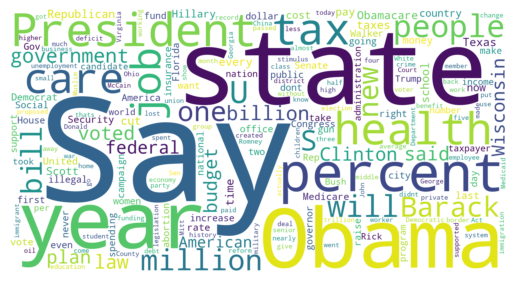

In [10]:
from wordcloud import WordCloud
text_0 = " ".join(t for t in df["Statement"][df["encoded_column_True"]==0])

wc = WordCloud(collocations=False, background_color='white', width=2048, height=1080).generate(text_0)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

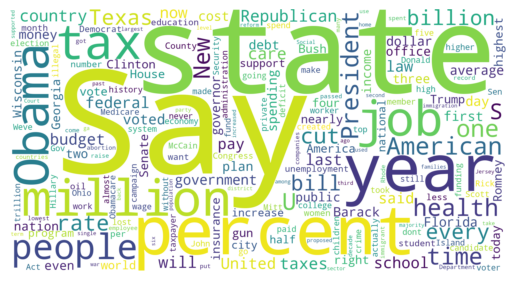

In [11]:
text_1 = " ".join(t for t in df["Statement"][df["encoded_column_True"]==1])

wc = WordCloud(collocations=False, background_color='white', width=2048, height=1080).generate(text_1)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [12]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

vc = TfidfVectorizer()
xv_train = vc.fit_transform(x_train)
xv_test = vc.transform(x_test)

In [13]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(xv_train,y_train)
y_pred_knn = knn.predict(xv_test)
print('Accuracy:', accuracy_score(y_test, y_pred_knn))

Accuracy: 0.5390043120344963


In [14]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=150)
rf.fit(xv_train,y_train)
y_pred_rf = rf.predict(xv_test)
print('Accuracy:', accuracy_score(y_test, y_pred_rf))

Accuracy: 0.6295570364562917


# RandomForest got an accuracy of 62%